In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
fraud = pd.read_csv("fraud_data.csv")

In [3]:
print fraud.shape

(21693, 30)


In [4]:
print fraud.columns

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9', u'V10',
       u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18', u'V19',
       u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27', u'V28',
       u'Amount', u'Class'],
      dtype='object')


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
print "Percentage of fraudulent observations in dataset:", fraud.Class.mean()

Percentage of fraudulent observations in dataset: 0.016410823768


In [9]:
X = fraud.iloc[:, :-1]
y = fraud.iloc[:, -1]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [10]:
print xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

(16269, 29) (5424, 29) (16269L,) (5424L,)


In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [14]:
dummyMajority = DummyClassifier(strategy = "most_frequent").fit(xtrain, ytrain)
dummyPreds = dummyMajority.predict(xtest)

In [21]:
print "Accuracy of dummy majority classifier: ", accuracy_score(ytest, dummyPreds)
print "Recall of dummy majority classifier: ", recall_score(ytest, dummyPreds)
print "Precision of dummy majority classifier: ", precision_score(ytest, dummyPreds);
print "F1 score of dummy majority classifier: ", f1_score(ytest, dummyPreds);

Accuracy of dummy majority classifier:  0.985250737463
Recall of dummy majority classifier:  0.0
Precision of dummy majority classifier:  0.0
F1 score of dummy majority classifier:  0.0


In [22]:
from sklearn.metrics import classification_report

In [24]:
print classification_report(ytest, dummyPreds, target_names=["not fraud", "fraud"]);

             precision    recall  f1-score   support

  not fraud       0.99      1.00      0.99      5344
      fraud       0.00      0.00      0.00        80

avg / total       0.97      0.99      0.98      5424



In [25]:
svc = SVC().fit(xtrain, ytrain)
svPreds = svc.predict(xtest)

In [29]:
print "Accuracy of SVC:", accuracy_score(ytest, svPreds)
print "Precision of SVC:", precision_score(ytest, svPreds)
print "Recall of SVC:", recall_score(ytest, svPreds)
print "F1 score of SVC:", f1_score(ytest, svPreds)

Accuracy of SVC: 0.990781710914
Precision of SVC: 1.0
Recall of SVC: 0.375
F1 score of SVC: 0.545454545455


In [30]:
print classification_report(ytest, svPreds, target_names=["not fraud", "fraud"])

             precision    recall  f1-score   support

  not fraud       0.99      1.00      1.00      5344
      fraud       1.00      0.38      0.55        80

avg / total       0.99      0.99      0.99      5424



In [31]:
svc2 = SVC(C=1e9, gamma=1e-07).fit(xtrain, ytrain)
svPreds = svc2.predict(xtest)

In [32]:
print "Accuracy of SVC:", accuracy_score(ytest, svPreds)
print "Precision of SVC:", precision_score(ytest, svPreds)
print "Recall of SVC:", recall_score(ytest, svPreds)
print "F1 score of SVC:", f1_score(ytest, svPreds)

Accuracy of SVC: 0.996312684366
Precision of SVC: 0.941176470588
Recall of SVC: 0.8
F1 score of SVC: 0.864864864865


In [33]:
print classification_report(ytest, svPreds, target_names=["not fraud", "fraud"])

             precision    recall  f1-score   support

  not fraud       1.00      1.00      1.00      5344
      fraud       0.94      0.80      0.86        80

avg / total       1.00      1.00      1.00      5424



In [42]:
print confusion_matrix(ytest, svPreds)

[[5340    4]
 [  16   64]]


In [43]:
from sklearn.metrics import precision_recall_curve

In [44]:
logScores = LogisticRegression().fit(xtrain, ytrain).decision_function(xtest)
precision, recall, thresholds = precision_recall_curve(ytest, logScores)

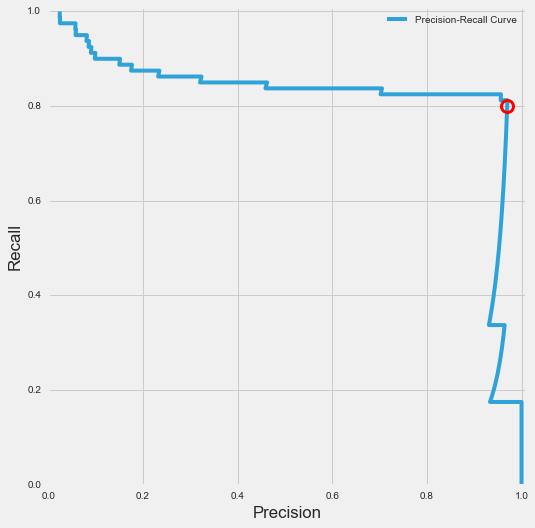

In [47]:
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure(figsize=(8, 8));
plt.xlim([0.0, 1.01]);
plt.ylim([0.0, 1.01]);
plt.plot(precision, recall, label="Precision-Recall Curve")
plt.plot(closest_zero_p, closest_zero_r, "o", markersize = 12, fillstyle="none", c="r", mew=3);
plt.xlabel("Precision");
plt.ylabel("Recall");
plt.axes().set_aspect("equal");
plt.legend();
plt.show();

In [48]:
from sklearn.metrics import roc_curve, auc

In [50]:
fpr, tpr, _ = roc_curve(ytest, logScores)
logAuc = auc(fpr, tpr)

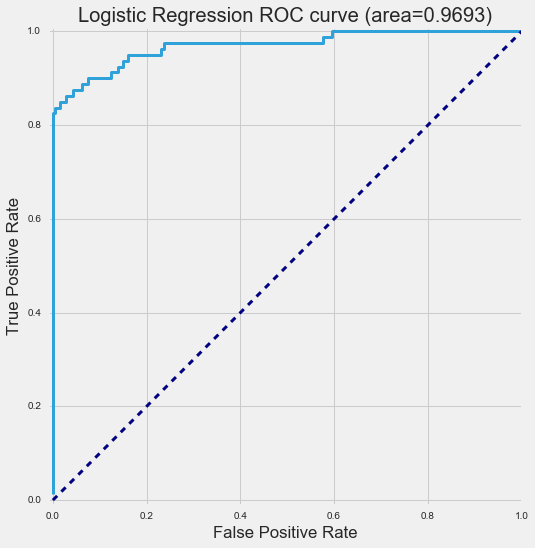

In [55]:
plt.figure(figsize=(8, 8));
plt.xlim([-0.01, 1]);
plt.ylim([-0.01, 1.01]);
plt.plot(fpr, tpr, lw=3);
plt.title("Logistic Regression ROC curve (area={:0.4f})".format(logAuc));
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--");
plt.axes().set_aspect("equal");

In [57]:
penalties = ["l1", "l2"]
Cs = [0.01, 0.1, 1, 10, 100]
gridLog = GridSearchCV(LogisticRegression(), param_grid={"penalty": penalties, "C": Cs})
gridLog.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
test_scores = gridLog.cv_results_["mean_test_score"].reshape((5, 2))
test_df = pd.DataFrame(test_scores, columns=["l1", "l2"], index=["0.01", "0.1", "1.0", "10.0", "100.0"])
print test_df

             l1        l2
0.01   0.994222  0.995390
0.1    0.996066  0.996189
1.0    0.996066  0.996128
10.0   0.995882  0.995943
100.0  0.995882  0.995882


In [64]:
print gridLog.best_params_

{'penalty': 'l2', 'C': 0.1}


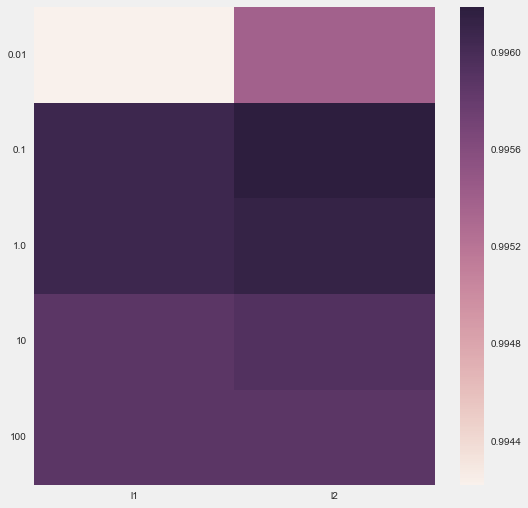

In [66]:
plt.figure(figsize=(8, 8));
sns.heatmap(test_scores, xticklabels=["l1", "l2"], yticklabels=[0.01, 0.1, 1.0, 10, 100]);
plt.yticks(rotation=0);